In [58]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error ,r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
import seaborn as sns
from sklearn.preprocessing import Imputer,LabelBinarizer,OneHotEncoder
from scipy.stats import norm, skew
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings("ignore")

In [59]:
df = pd.read_csv('../Data/test.csv')

In [60]:
print('Shape of the dataset : ',df.shape)
df.head()

Shape of the dataset :  (5000, 43)


,ID,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,17591,current,M,37,575,2795.45,1290.0,6141.05,676.50,9146.10,...,24.0,20.0,9750.0,30527.88,31271.00,3.0,12.0,25945.92,Y,1170.49
1,13541,current,M,33,394,29405.13,1640.0,1670.00,2463.92,10947.50,...,43.0,40.0,16967.0,14342.83,16582.00,6.0,39.0,12214.00,Y,16447.45
2,13431,current,M,53,324,5985.20,6189.0,2696.09,766.00,716.00,...,42.0,35.0,36398.0,32503.16,33539.54,5.0,9.0,13215.00,Y,2622.28
3,8687,current,M,33,370,2105.93,18225.0,34763.56,167.00,4260.27,...,3.0,5.0,97825.0,93572.42,109429.75,21.0,0.0,72317.00,Y,340.79
4,14727,current,M,62,505,3269.00,3532.0,3158.40,2699.77,3373.48,...,70.0,75.0,27936.0,19011.50,41401.00,6.0,35.0,42344.00,Y,2812.20


In [61]:
ID = df[['ID']]
dataset = df.drop(['ID'],1)
print('Shape of the dataset : ',dataset.shape)
dataset.head()
dataset.describe()

Shape of the dataset :  (5000, 42)


,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,...,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.00000,...,5.000000e+03,5000.00000,5000.000000,5.000000e+03,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5.000000e+03,5.000000e+03
mean,47.317400,600.644600,17555.788531,8008.518794,15745.346811,7698.893154,12156.191586,7147.398462,41.97800,33.80580,...,8.104022e+04,11.90660,40.908800,6.126822e+04,8.401159e+04,7.975822e+04,19.782600,44.172800,5.363976e+04,1.431139e+04
std,29.525809,220.258013,25071.591566,13953.058488,24782.420052,14110.101466,19671.653238,13498.992520,99.03486,52.58044,...,1.515226e+05,16.89398,40.636648,2.324130e+05,4.101948e+05,1.808167e+05,26.618382,35.055646,1.510505e+05,1.270072e+05
min,25.000000,123.000000,294.000000,41.000000,157.000000,22.000000,75.000000,62.000000,1.00000,1.00000,...,6.977000e+01,0.00000,0.000000,2.500000e-01,4.900000e+01,1.188000e+01,1.000000,0.000000,6.000000e-02,0.000000e+00
25%,33.000000,428.000000,4290.135000,1563.730000,3618.000000,1582.000000,2996.142500,1389.750000,5.00000,8.00000,...,2.464450e+04,2.00000,11.000000,2.042750e+04,2.587680e+04,2.491456e+04,4.000000,12.000000,1.858725e+04,1.529960e+03
50%,39.000000,623.000000,10032.000000,3875.500000,8418.615000,3740.200000,6671.235000,3302.560000,10.00000,22.50000,...,4.806300e+04,4.00000,23.000000,3.188850e+04,4.550901e+04,4.678093e+04,7.000000,36.000000,2.985900e+04,3.856350e+03
75%,53.250000,799.000000,20660.260000,9354.650000,17867.902500,8392.000000,14096.190000,7153.000000,44.00000,43.00000,...,9.408800e+04,10.00000,69.000000,5.736625e+04,8.748820e+04,8.767128e+04,21.000000,73.000000,5.363800e+04,9.369155e+03
max,223.000000,974.000000,342847.900000,221348.000000,482474.200000,332937.940000,302751.410000,233384.000000,531.00000,601.00000,...,4.148625e+06,71.00000,171.000000,1.000000e+07,2.642915e+07,6.611953e+06,117.000000,133.000000,5.200000e+06,7.447125e+06


In [62]:
#Check numerical and categorical features:

#Function that returns dataframe with only categorical features
def check_categorical(dataset):
    cat_columns = dataset.select_dtypes(include='object').columns
    return dataset[cat_columns]
check_categorical(dataset)

,account_type,gender,loan_enq
0,current,M,Y
1,current,M,Y
2,current,M,Y
3,current,M,Y
4,current,M,Y
5,saving,M,Y
6,current,M,Y
7,current,M,Y
8,saving,M,Y
9,current,M,Y


In [63]:
#Function that returns dataframe with numerical features
def check_numerical(dataset):
    num_columns = dataset.select_dtypes(include=np.number).columns
    return dataset[num_columns]
check_numerical(dataset)

,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,...,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active
0,37,575,2795.450,1290.00,6141.050,676.50,9146.100,15479.00,4.0,10.0,...,41755.00,24.0,20.0,9750.00,30527.88,31271.00,3.0,12.0,25945.92,1170.49
1,33,394,29405.130,1640.00,1670.000,2463.92,10947.500,956.00,3.0,10.0,...,130299.00,43.0,40.0,16967.00,14342.83,16582.00,6.0,39.0,12214.00,16447.45
2,53,324,5985.200,6189.00,2696.090,766.00,716.000,4133.22,7.0,30.0,...,40422.00,42.0,35.0,36398.00,32503.16,33539.54,5.0,9.0,13215.00,2622.28
3,33,370,2105.930,18225.00,34763.560,167.00,4260.270,20185.00,1.0,99.0,...,48148.00,3.0,5.0,97825.00,93572.42,109429.75,21.0,0.0,72317.00,340.79
4,62,505,3269.000,3532.00,3158.400,2699.77,3373.480,5120.00,2.0,10.0,...,25926.00,70.0,75.0,27936.00,19011.50,41401.00,6.0,35.0,42344.00,2812.20
5,30,454,11495.510,2701.00,3957.240,1395.00,36608.500,2296.00,2.0,23.0,...,80813.00,2.0,8.0,27906.00,23978.50,32248.75,9.0,63.0,24986.00,291.16
6,33,796,3837.390,10809.00,126467.150,6204.00,3947.370,6288.00,5.0,11.0,...,45735.00,2.0,20.0,11388.00,14789.48,33319.00,5.0,32.0,45228.00,4786.40
7,223,575,22928.500,6331.49,9974.840,2699.00,4578.000,704.00,531.0,1.0,...,15929.00,3.0,20.0,69056.00,25376.75,81303.01,22.0,58.0,39930.00,8186.99
8,37,623,2698.000,727.00,5264.500,5528.00,11310.500,627.44,26.0,9.0,...,36959.00,47.0,13.0,15700.00,22579.57,12317.00,6.0,12.0,63300.00,54632.60
9,34,123,6772.780,332.00,3343.560,8650.56,3672.500,4695.52,16.0,4.0,...,182908.00,47.0,11.0,77764.00,178334.88,111699.00,1.0,6.0,24559.00,3796.29


In [64]:
#Check for missing values
def missing_values(dataframe):
    percent_null = (dataframe.isnull().sum()/dataframe.shape[0])*100
    missing_data = pd.Series(percent_null,index=dataframe.columns)
    return missing_data
missing_values(dataset)


account_type             0.0
gender                   0.0
age                      0.0
region_code              0.0
cc_cons_apr              0.0
dc_cons_apr              0.0
cc_cons_may              0.0
dc_cons_may              0.0
cc_cons_jun              0.0
dc_cons_jun              0.0
cc_count_apr             0.0
cc_count_may             0.0
cc_count_jun             0.0
dc_count_apr             0.0
dc_count_may             0.0
dc_count_jun             0.0
card_lim                 0.0
personal_loan_active     0.0
vehicle_loan_active      0.0
personal_loan_closed     0.0
vehicle_loan_closed      0.0
investment_1             0.0
investment_2             0.0
investment_3             0.0
investment_4             0.0
debit_amount_apr         0.0
credit_amount_apr        0.0
debit_count_apr          0.0
credit_count_apr         0.0
max_credit_amount_apr    0.0
debit_amount_may         0.0
credit_amount_may        0.0
credit_count_may         0.0
debit_count_may          0.0
max_credit_amo

In [65]:
dataset.loc[dataset['debit_amount_apr'] < dataset['cc_cons_apr']+dataset['dc_cons_apr'],'debit_amount_apr'] = dataset['cc_cons_apr']+dataset['dc_cons_apr']
dataset.loc[dataset['debit_amount_apr'] < dataset['cc_cons_apr']+dataset['dc_cons_apr'],'debit_amount_apr']

Series([], Name: debit_amount_apr, dtype: float64)

In [66]:
dataset.loc[dataset['debit_amount_may'] < dataset['cc_cons_may']+dataset['dc_cons_may'],'debit_amount_may'] = dataset['cc_cons_may']+dataset['dc_cons_may']
dataset.loc[dataset['debit_amount_may'] < dataset['cc_cons_may']+dataset['dc_cons_may'],'debit_amount_may']

Series([], Name: debit_amount_may, dtype: float64)

In [67]:
dataset.loc[dataset['debit_amount_jun'] < dataset['cc_cons_jun']+dataset['dc_cons_jun'],'debit_amount_jun'] = dataset['cc_cons_jun']+dataset['dc_cons_jun']
dataset.loc[dataset['debit_amount_jun'] < dataset['cc_cons_jun']+dataset['dc_cons_jun'],'debit_amount_jun']

Series([], Name: debit_amount_jun, dtype: float64)

In [68]:
dataset.loc[dataset['credit_amount_apr'] > dataset['max_credit_amount_apr'],'credit_amount_apr'] = dataset['max_credit_amount_apr']
dataset[['credit_amount_apr','max_credit_amount_apr']]

,credit_amount_apr,max_credit_amount_apr
0,24485.00,24485.00
1,3375.00,3375.00
2,14950.00,14950.00
3,43173.38,235844.00
4,14495.00,14495.00
5,9418.00,22599.00
6,109318.16,117591.00
7,41599.00,124720.00
8,28601.00,57417.00
9,52341.00,52341.00


In [69]:
dataset.loc[dataset['credit_amount_may'] > dataset['max_credit_amount_may'],'credit_amount_may'] = dataset['max_credit_amount_may']
dataset[['credit_amount_may','max_credit_amount_may']]

,credit_amount_may,max_credit_amount_may
0,9750.00,9750.00
1,16967.00,16967.00
2,36398.00,36398.00
3,48148.00,97825.00
4,25926.00,27936.00
5,27906.00,27906.00
6,11388.00,11388.00
7,15929.00,69056.00
8,15700.00,15700.00
9,77764.00,77764.00


In [70]:
dataset.loc[dataset['credit_amount_jun'] > dataset['max_credit_amount_jun'],'credit_amount_jun'] = dataset['max_credit_amount_jun']
dataset[['credit_amount_jun','max_credit_amount_jun']]

,credit_amount_jun,max_credit_amount_jun
0,25945.92,25945.92
1,12214.00,12214.00
2,13215.00,13215.00
3,72317.00,72317.00
4,41401.00,42344.00
5,24986.00,24986.00
6,33319.00,45228.00
7,39930.00,39930.00
8,12317.00,63300.00
9,24559.00,24559.00


In [45]:
def check_outliers(dataframe):
    outliers = pd.DataFrame(columns=['Features','Outliers'])
    for col in dataframe.columns:
        if col in dataframe.select_dtypes(include=np.number).columns:
            q1 = dataframe[col].quantile(0.25)
            q3 = dataframe[col].quantile(0.75)
            iqr = q3-q1
            lower_fence = q1-(1.5*iqr)
            higher_fence = q3+(1.5*iqr)
            
            outliers = outliers.append({'Features':col,'Outliers':dataframe.loc[(dataframe[col] < lower_fence) | (dataframe[col] > higher_fence)].shape[0]},ignore_index=True)
    return(outliers.sort_values(by='Outliers',ascending=False))
check_outliers(dataset)                                        

,Features,Outliers
30,credit_count_may,953
35,credit_count_jun,740
19,investment_1,662
21,investment_3,519
7,dc_cons_jun,488
32,max_credit_amount_may,469
37,max_credit_amount_jun,451
38,emi_active,447
27,max_credit_amount_apr,439
12,dc_count_may,428


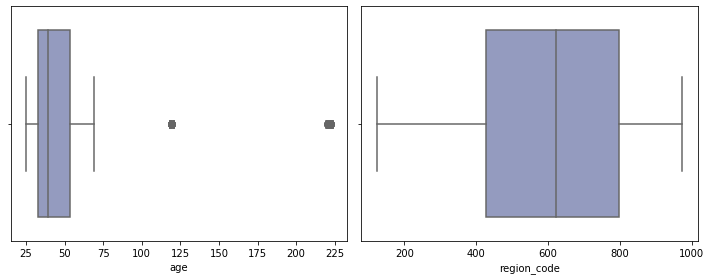

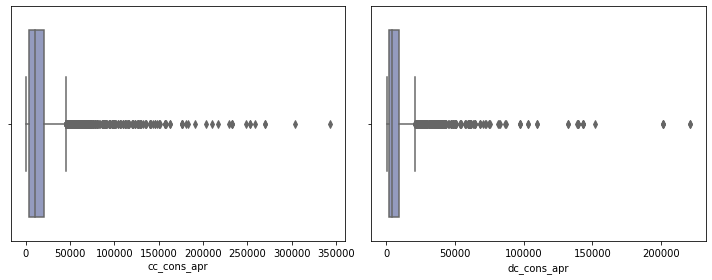

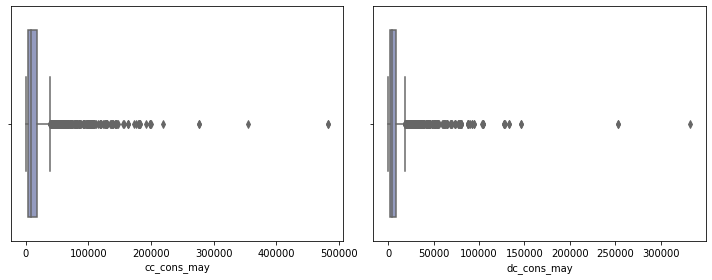

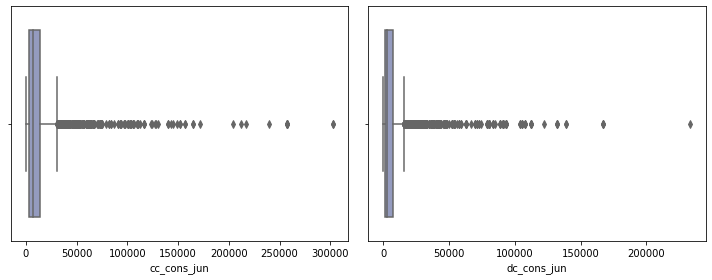

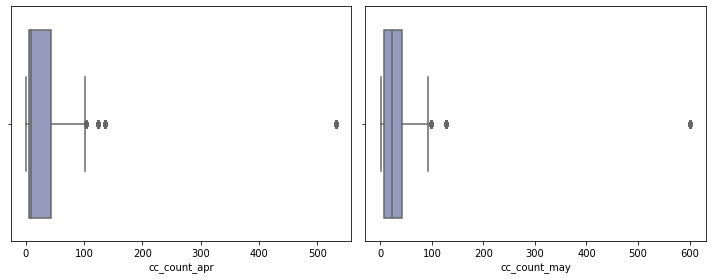

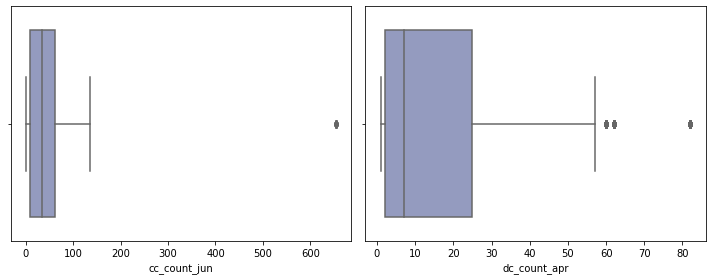

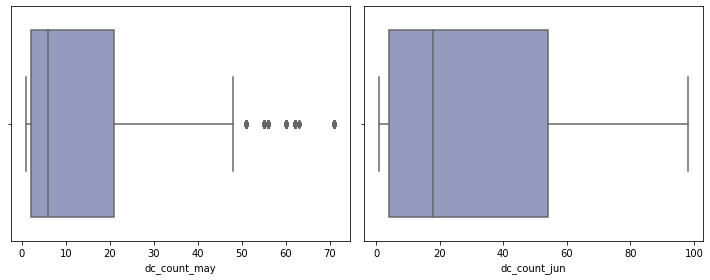

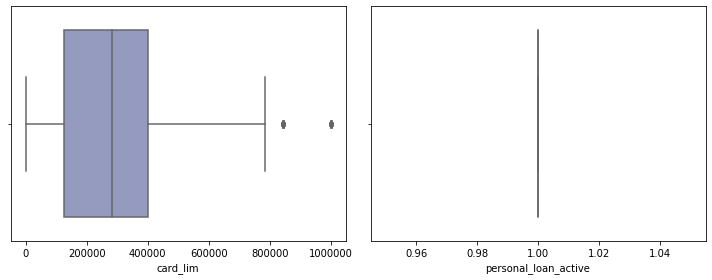

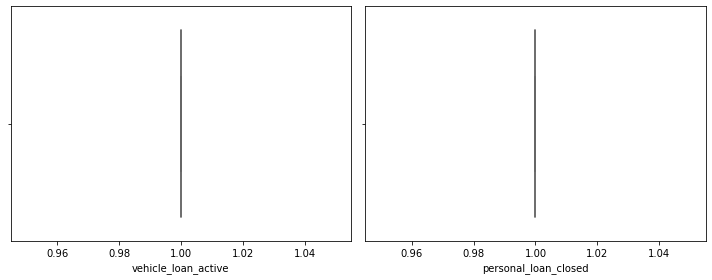

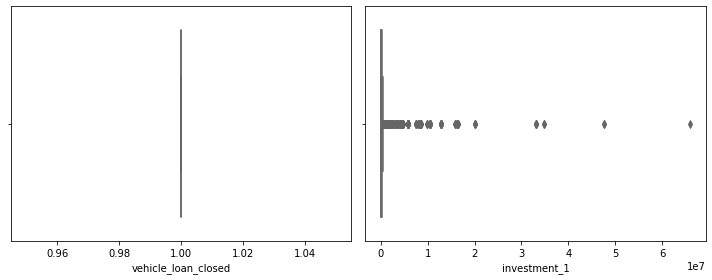

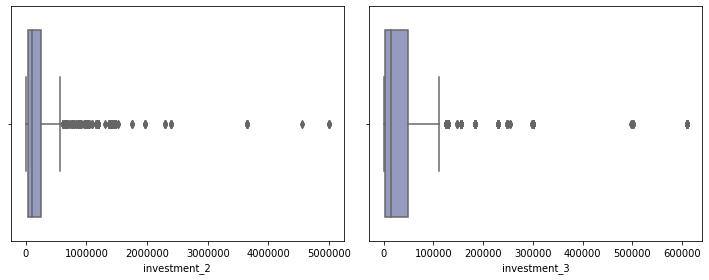

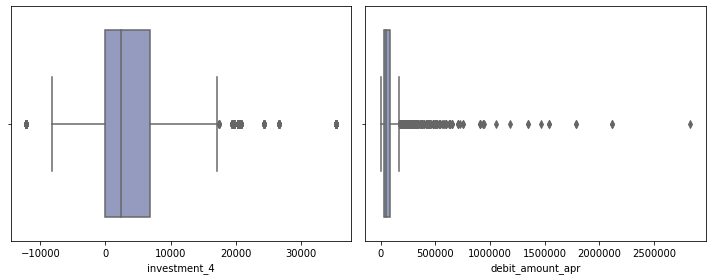

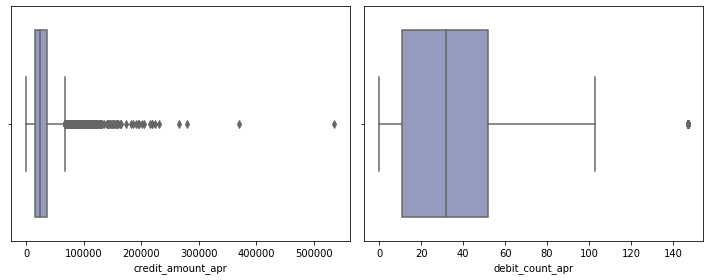

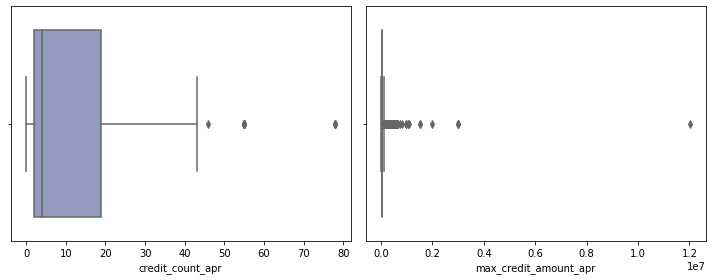

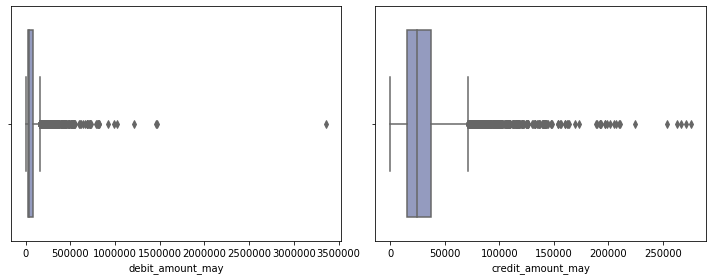

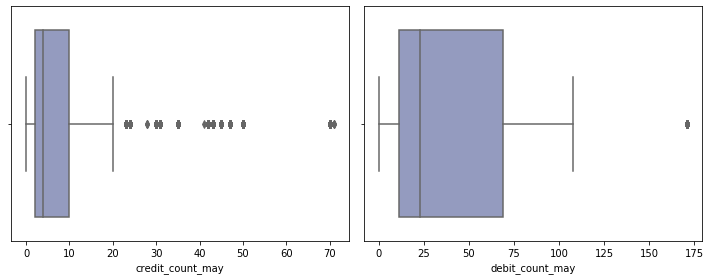

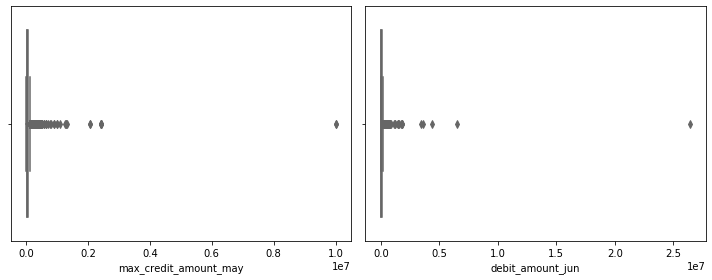

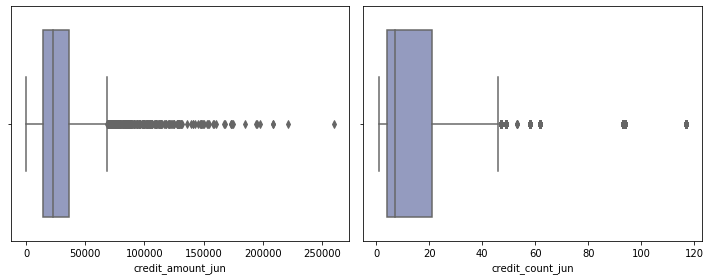

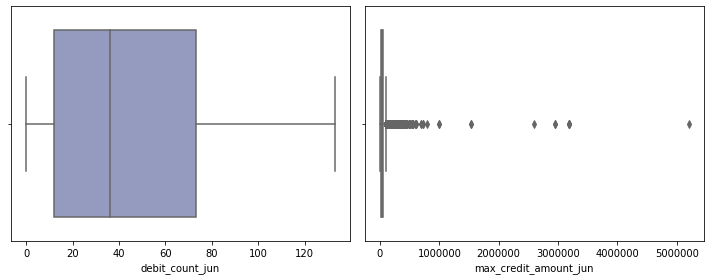

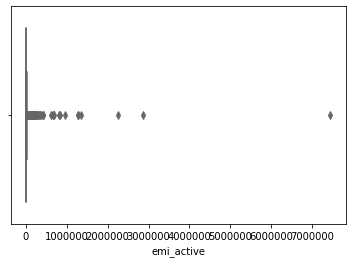

In [71]:
def plot_boxplots(dataset):
    numerical_df = check_numerical(dataset)
    numerical_columns = numerical_df.columns.tolist()
    for i in range(0,len(numerical_columns),2):
        if len(numerical_columns) > i+1:
            plt.figure(figsize=(10,4))
            plt.subplot(121)
            sns.boxplot(dataset[numerical_columns[i]],palette='BuPu_r')
            plt.subplot(122)            
            sns.boxplot(dataset[numerical_columns[i+1]],palette='BuPu_r')
            plt.tight_layout()
            plt.show()

        else:
            sns.boxplot(dataset[numerical_columns[i]],palette='BuPu_r')
plot_boxplots(dataset)

Empty DataFrame
Columns: [account_type, gender, age, region_code, cc_cons_apr, dc_cons_apr, cc_cons_may, dc_cons_may, cc_cons_jun, dc_cons_jun, cc_count_apr, cc_count_may, cc_count_jun, dc_count_apr, dc_count_may, dc_count_jun, card_lim, personal_loan_active, vehicle_loan_active, personal_loan_closed, vehicle_loan_closed, investment_1, investment_2, investment_3, investment_4, debit_amount_apr, credit_amount_apr, debit_count_apr, credit_count_apr, max_credit_amount_apr, debit_amount_may, credit_amount_may, credit_count_may, debit_count_may, max_credit_amount_may, debit_amount_jun, credit_amount_jun, credit_count_jun, debit_count_jun, max_credit_amount_jun, loan_enq, emi_active]
Index: []

[0 rows x 42 columns]


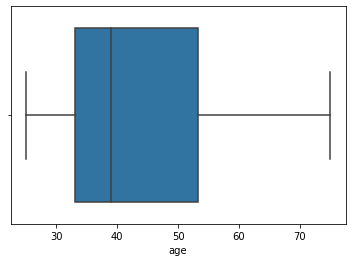

In [72]:
#Handling outliers in age

dataset['age'] = np.where(dataset['age'] >75, 75,dataset['age'])
sns.boxplot(dataset['age'])
print(dataset.loc[dataset['age']>75])

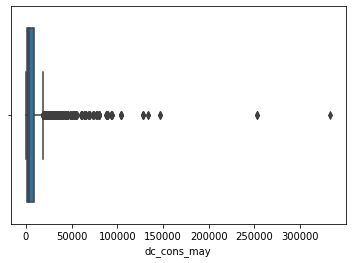

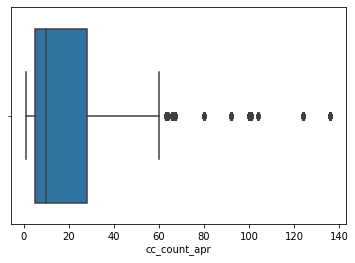

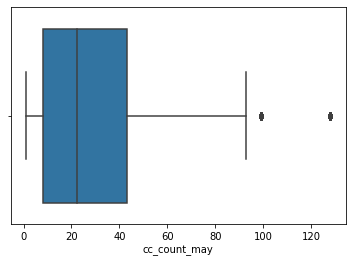

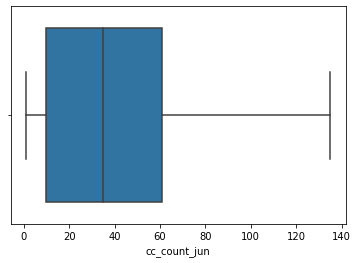

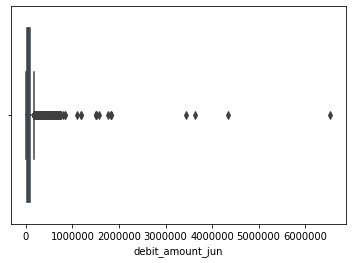

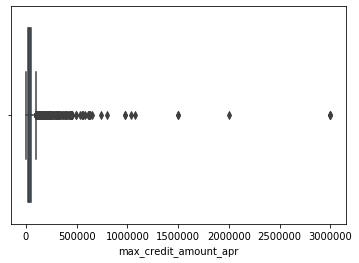

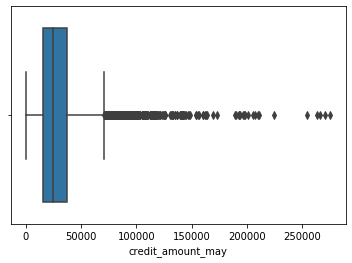

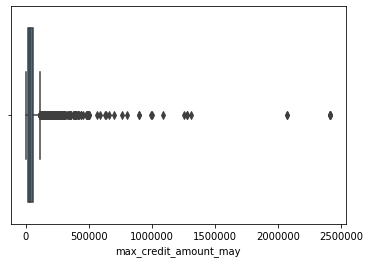

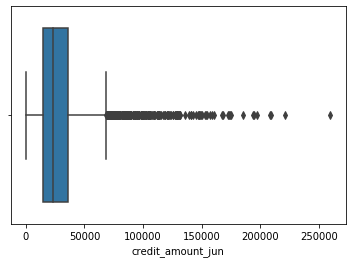

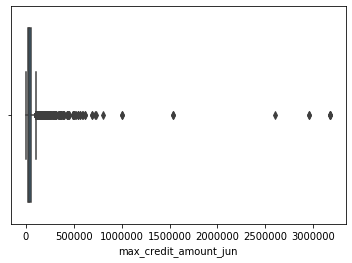

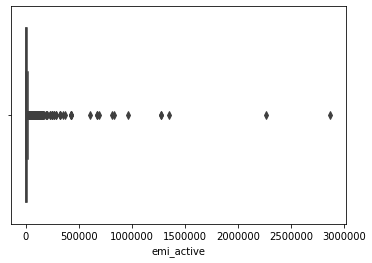

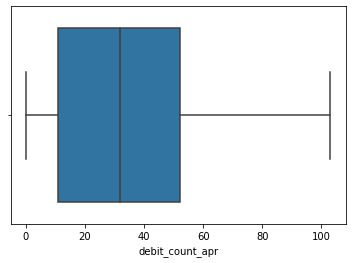

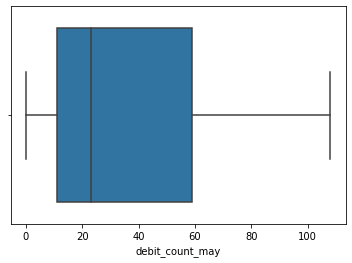

In [73]:
#Handling outliers in cc_cons_apr, cc_cons_may, dc_cons_may, cc_cons_jun, investment_2, debit_amount_apr,debit_amount_may,debit_amount_jun
# credit_amount_jun,max_credit_amount_jun, emi_active beyond the range of 3500000

def handle_outliers(list_of_columns,value):
    for col in list_of_columns:
        median_col = dataset[col].median()
        dataset[col] = np.where(dataset[col] >value, median_col,dataset[col])
        sns.boxplot(dataset[col])
        plt.show()

credit_debit_card_amount = ['dc_cons_may']
amount = 350000

credit_debit_card_transactions = ['cc_count_apr','cc_count_may','cc_count_jun']
transactions = 200

debit_amount_jun = ['debit_amount_jun']
debit_amount_jun_val =  10000000
debit_credit_months =['max_credit_amount_apr','credit_amount_may','max_credit_amount_may','credit_amount_jun','max_credit_amount_jun','emi_active']
debit_credit_months_val = 4000000

total_debit_transactions = ['debit_count_apr','debit_count_may']
total_transactions = 120

handle_outliers(credit_debit_card_amount,350000)
handle_outliers(credit_debit_card_transactions,transactions)
handle_outliers(debit_amount_jun,debit_amount_jun_val)
handle_outliers(debit_credit_months,debit_credit_months_val)
handle_outliers(total_debit_transactions,total_transactions)

In [74]:
check_outliers(dataset)

,Features,Outliers
30,credit_count_may,953
35,credit_count_jun,740
19,investment_1,662
8,cc_count_apr,533
21,investment_3,519
7,dc_cons_jun,488
32,max_credit_amount_may,468
37,max_credit_amount_jun,450
38,emi_active,447
27,max_credit_amount_apr,438


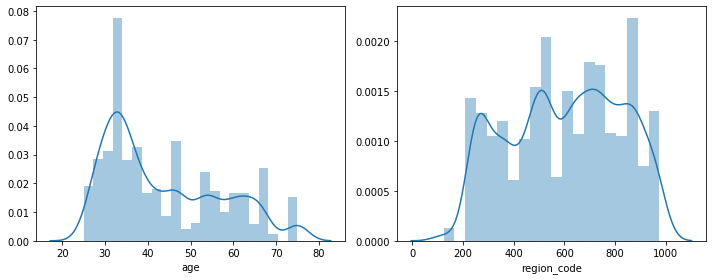

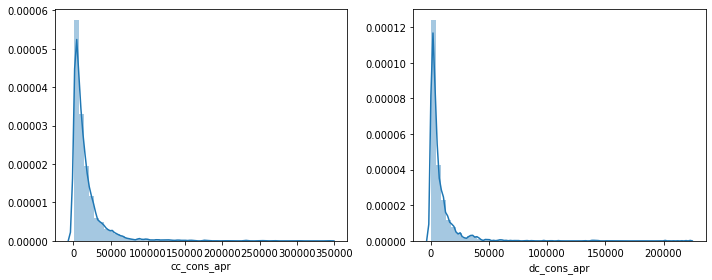

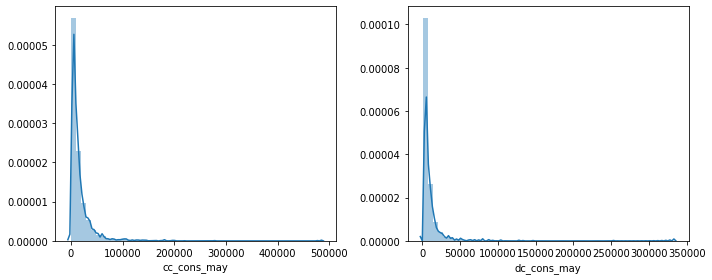

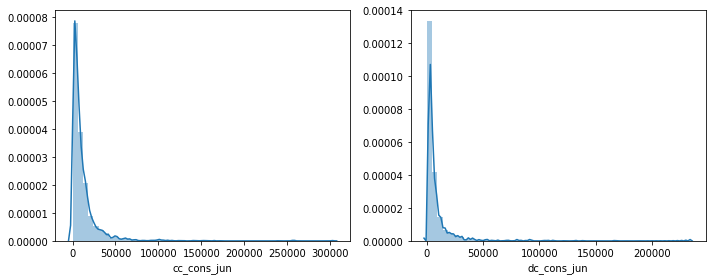

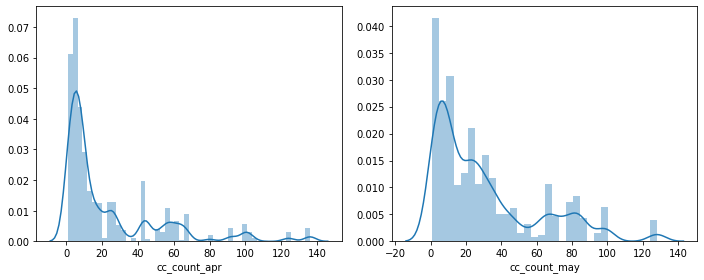

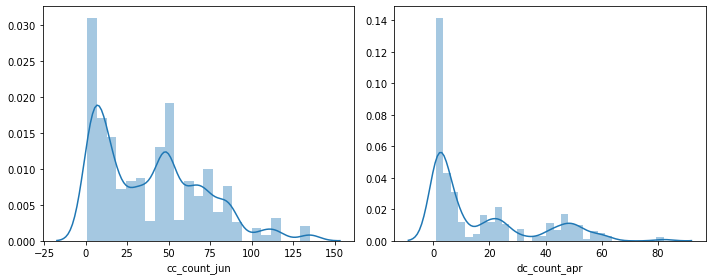

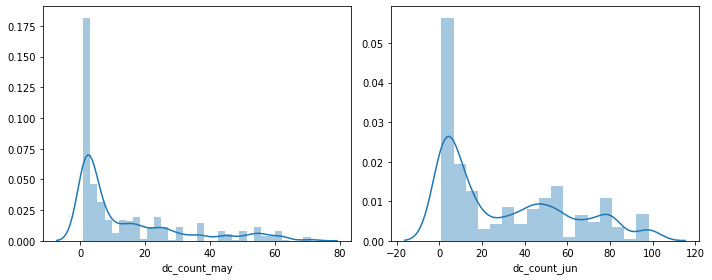

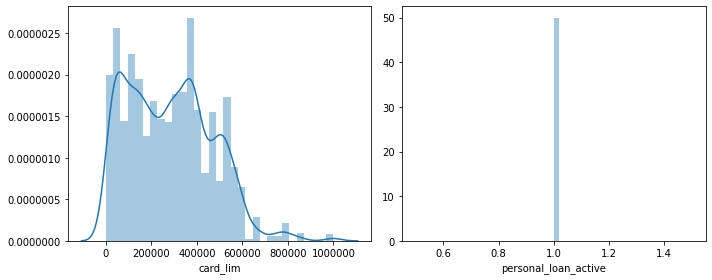

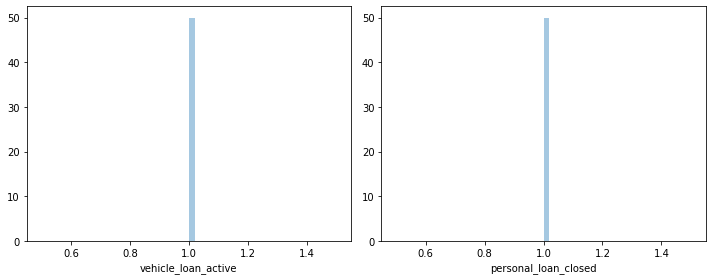

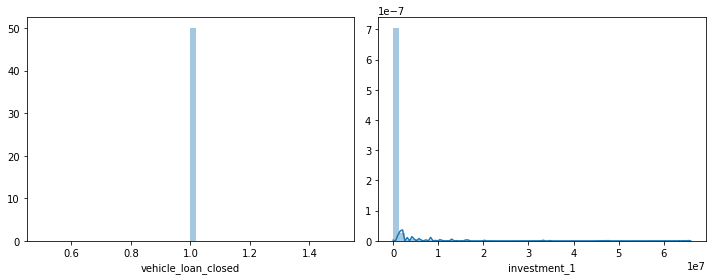

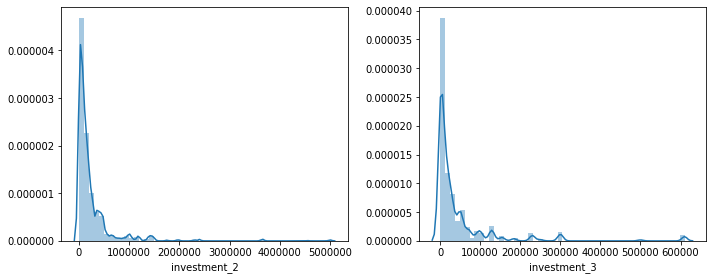

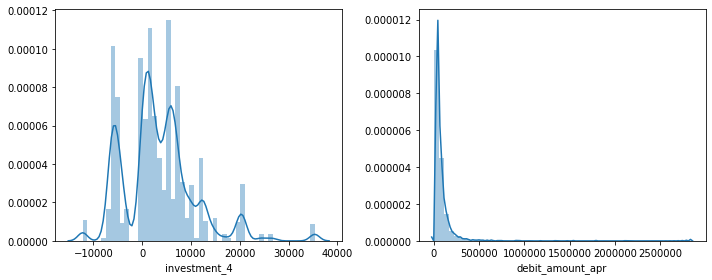

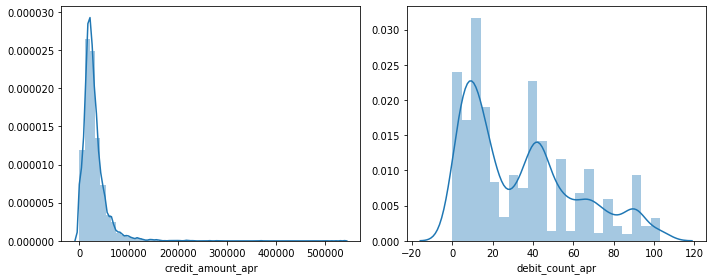

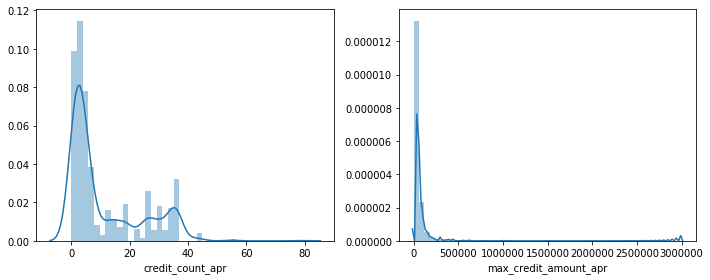

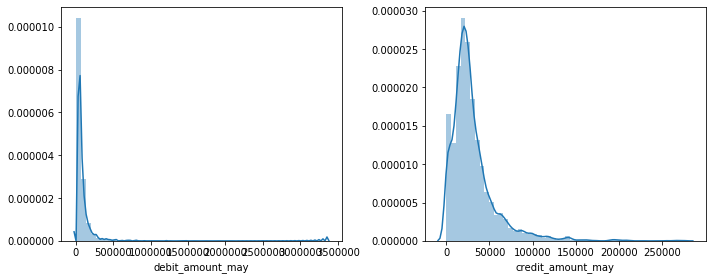

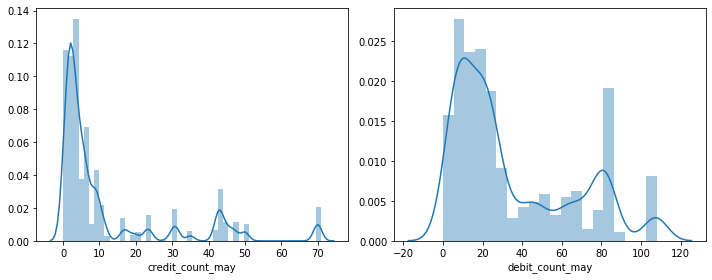

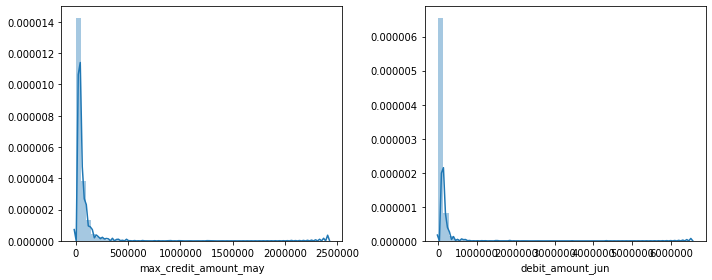

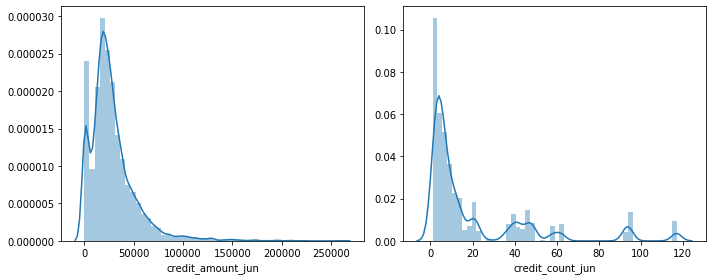

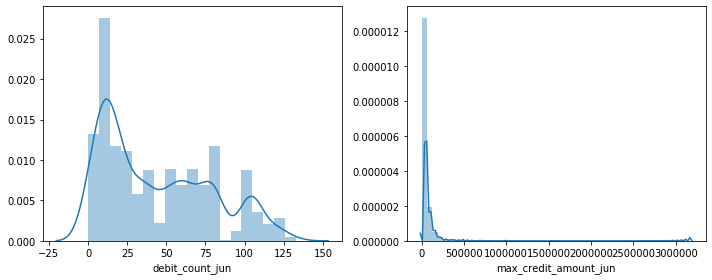

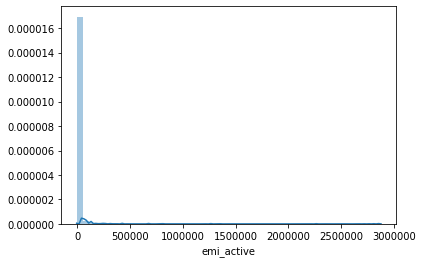

In [75]:
def plot_distplots(dataset):
    numerical_df = check_numerical(dataset)
    numerical_columns = numerical_df.columns.tolist()
    for i in range(0,len(numerical_columns),2):
        if len(numerical_columns) > i+1:
            plt.figure(figsize=(10,4))
            plt.subplot(121)
            sns.distplot(dataset[numerical_columns[i]])
            plt.subplot(122)            
            sns.distplot(dataset[numerical_columns[i+1]])
            plt.tight_layout()
            plt.show()

        else:
            sns.distplot(dataset[numerical_columns[i]])
plot_distplots(dataset)

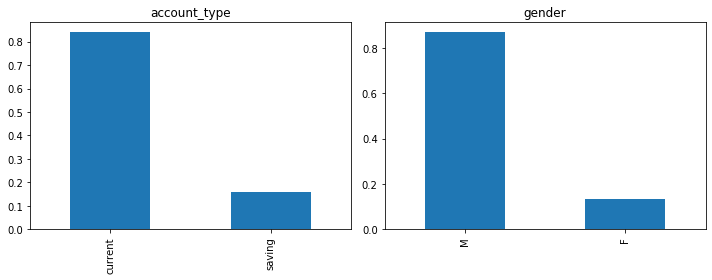

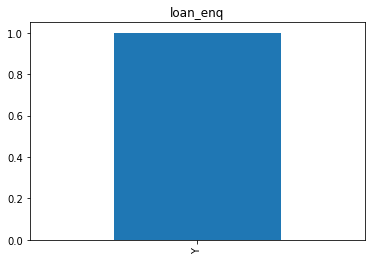

In [76]:
#Univariate anaylsis of categorical columns:
def plot_barplots(dataframe):
    categorical_columns = dataframe.select_dtypes(include=['object']).columns
    
    for i in range(0,len(categorical_columns),2):
            if len(categorical_columns) > i+1:
                
                plt.figure(figsize=(10,4))
                plt.subplot(121)
                dataframe[categorical_columns[i]].value_counts(normalize=True).plot(kind='bar')
                plt.title(categorical_columns[i])
                plt.subplot(122)     
                dataframe[categorical_columns[i+1]].value_counts(normalize=True).plot(kind='bar')
                plt.title(categorical_columns[i+1])
                plt.tight_layout()
                plt.show()

            else:
                dataframe[categorical_columns[i]].value_counts(normalize=True).plot(kind='bar')
                plt.title(categorical_columns[i])
plot_barplots(dataset)

In [77]:
# We see that the columns personal_loan_active, vehicle_loan_active,personal_loan_closed,vehicle_loan_closed have
# 0 variance and hence can be dropped as technically they will have no help in prediction
#Similarly, loan_enq has no variance and can be dropped

dataset_without_zerovariance_cols = dataset.drop(['personal_loan_active','vehicle_loan_active','personal_loan_closed','vehicle_loan_closed','loan_enq'],axis=1)

In [78]:
#Since Investment_4 column has negative values, we will add a constant term = 1-min(investment_4) to set all values to
# positive before applying sqrt transform to reduce skewness. 

min_investment_val = np.min(dataset_without_zerovariance_cols['investment_4'])
dataset_without_zerovariance_cols['investment_4'] = dataset_without_zerovariance_cols['investment_4'] + 1 - min_investment_val

In [79]:
def check_skewness(dataset):
    numerical_df = check_numerical(dataset)
    for i in numerical_df.columns:
        print(i,numerical_df[i].skew())
check_skewness(dataset_without_zerovariance_cols)

age 0.6641104482390682
region_code -0.11973404767587369
cc_cons_apr 4.603049787772629
dc_cons_apr 6.676186588813801
cc_cons_may 6.315444100161756
dc_cons_may 7.798154613953779
cc_cons_jun 6.353514999712653
dc_cons_jun 5.965157852107235
cc_count_apr 1.906392131120085
cc_count_may 1.2343094334684832
cc_count_jun 0.6817840711437196
dc_count_apr 1.144927812794911
dc_count_may 1.4752989510825092
dc_count_jun 0.6858705786041739
card_lim 0.4672259015566492
investment_1 12.432571184808529
investment_2 5.597800879504986
investment_3 4.087367448887759
investment_4 1.0409000733572877
debit_amount_apr 9.513724177613433
credit_amount_apr 4.530872132658755
debit_count_apr 0.718718373890108
credit_count_apr 1.195261434728046
max_credit_amount_apr 16.294785517856617
debit_amount_may 10.558921974935565
credit_amount_may 2.7907035586374738
credit_count_may 1.9149337670263133
debit_count_may 0.9269697188543062
max_credit_amount_may 12.759004749656148
debit_amount_jun 19.20358903519354
credit_amount_jun 2

In [80]:
def remove_skewness(dataset):
    numerical_df = check_numerical(dataset)
    for i in numerical_df.columns:
        if numerical_df[i].skew()>1:
            numerical_df[i] = np.sqrt(numerical_df[i])
    return numerical_df
transformed_dataset = remove_skewness(dataset_without_zerovariance_cols)
check_skewness(transformed_dataset)

age 0.6641104482390682
region_code -0.11973404767587369
cc_cons_apr 1.685317487903441
dc_cons_apr 2.0519618394324235
cc_cons_may 1.927139276315644
dc_cons_may 2.280764379228668
cc_cons_jun 2.091309363758697
dc_cons_jun 2.3669928078520743
cc_count_apr 1.0350521917147306
cc_count_may 0.4874205680785767
cc_count_jun 0.6817840711437196
dc_count_apr 0.6172896526503558
dc_count_may 0.8509629681521033
dc_count_jun 0.6858705786041739
card_lim 0.4672259015566492
investment_1 4.551660737351393
investment_2 1.845102745227564
investment_3 1.8498381601300602
investment_4 -0.2816708822898569
debit_amount_apr 2.808301379745459
credit_amount_apr 0.8313838131701216
debit_count_apr 0.718718373890108
credit_count_apr 0.6120656295021419
max_credit_amount_apr 4.043804560338889
debit_amount_may 2.444463457102683
credit_amount_may 0.6796955393083011
credit_count_may 1.1831432615111688
debit_count_may 0.9269697188543062
max_credit_amount_may 3.64134084695066
debit_amount_jun 3.9724224195843076
credit_amount_j

In [81]:
transformed_dataset

,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,...,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active
0,37,575,52.872015,35.916570,78.364852,26.009614,95.635245,124.414629,2.000000,3.162278,...,98.742088,4.898979,20.0,98.742088,174.722294,161.077373,1.732051,12.0,161.077373,34.212425
1,33,394,171.479241,40.496913,40.865633,49.637889,104.630302,30.919250,1.732051,3.162278,...,130.257437,6.557439,40.0,130.257437,119.761555,110.516967,2.449490,39.0,110.516967,128.247612
2,53,324,77.364074,78.670198,51.923887,27.676705,26.758176,64.290124,2.645751,5.477226,...,190.782599,6.480741,35.0,190.782599,180.286328,114.956514,2.236068,9.0,114.956514,51.208202
3,33,370,45.890413,135.000000,186.449886,12.922848,65.270744,142.073924,1.000000,9.949874,...,219.426525,1.732051,5.0,312.769883,305.896093,268.918203,4.582576,0.0,268.918203,18.460498
4,62,505,57.175169,59.430632,56.199644,51.959311,58.081667,71.554175,1.414214,3.162278,...,161.015527,8.366600,75.0,167.140659,137.882196,203.472357,2.449490,35.0,205.776578,53.030180
5,30,454,107.217116,51.971146,62.906597,37.349699,191.333479,47.916594,1.414214,4.795832,...,167.050890,1.414214,8.0,167.050890,197.242237,158.069605,3.000000,63.0,158.069605,17.063411
6,33,796,61.946671,103.966341,355.622201,78.765475,62.828099,79.296910,2.236068,3.316625,...,106.714573,1.414214,20.0,106.714573,121.612006,182.534928,2.236068,32.0,212.668757,69.183813
7,75,575,151.421597,79.570660,99.874121,51.951901,67.660919,26.532998,3.162278,1.000000,...,126.210142,1.732051,20.0,262.785083,159.300816,199.824923,4.690416,58.0,199.824923,90.481987
8,37,623,51.942276,26.962938,72.556874,74.350521,106.350835,25.048752,5.099020,3.000000,...,125.299641,6.855655,13.0,125.299641,150.264999,110.981981,2.449490,12.0,251.594913,233.736176
9,34,123,82.296902,18.220867,57.823525,93.008387,60.601155,68.523864,4.000000,2.000000,...,278.861973,6.855655,11.0,278.861973,422.297147,156.713114,1.000000,6.0,156.713114,61.614041


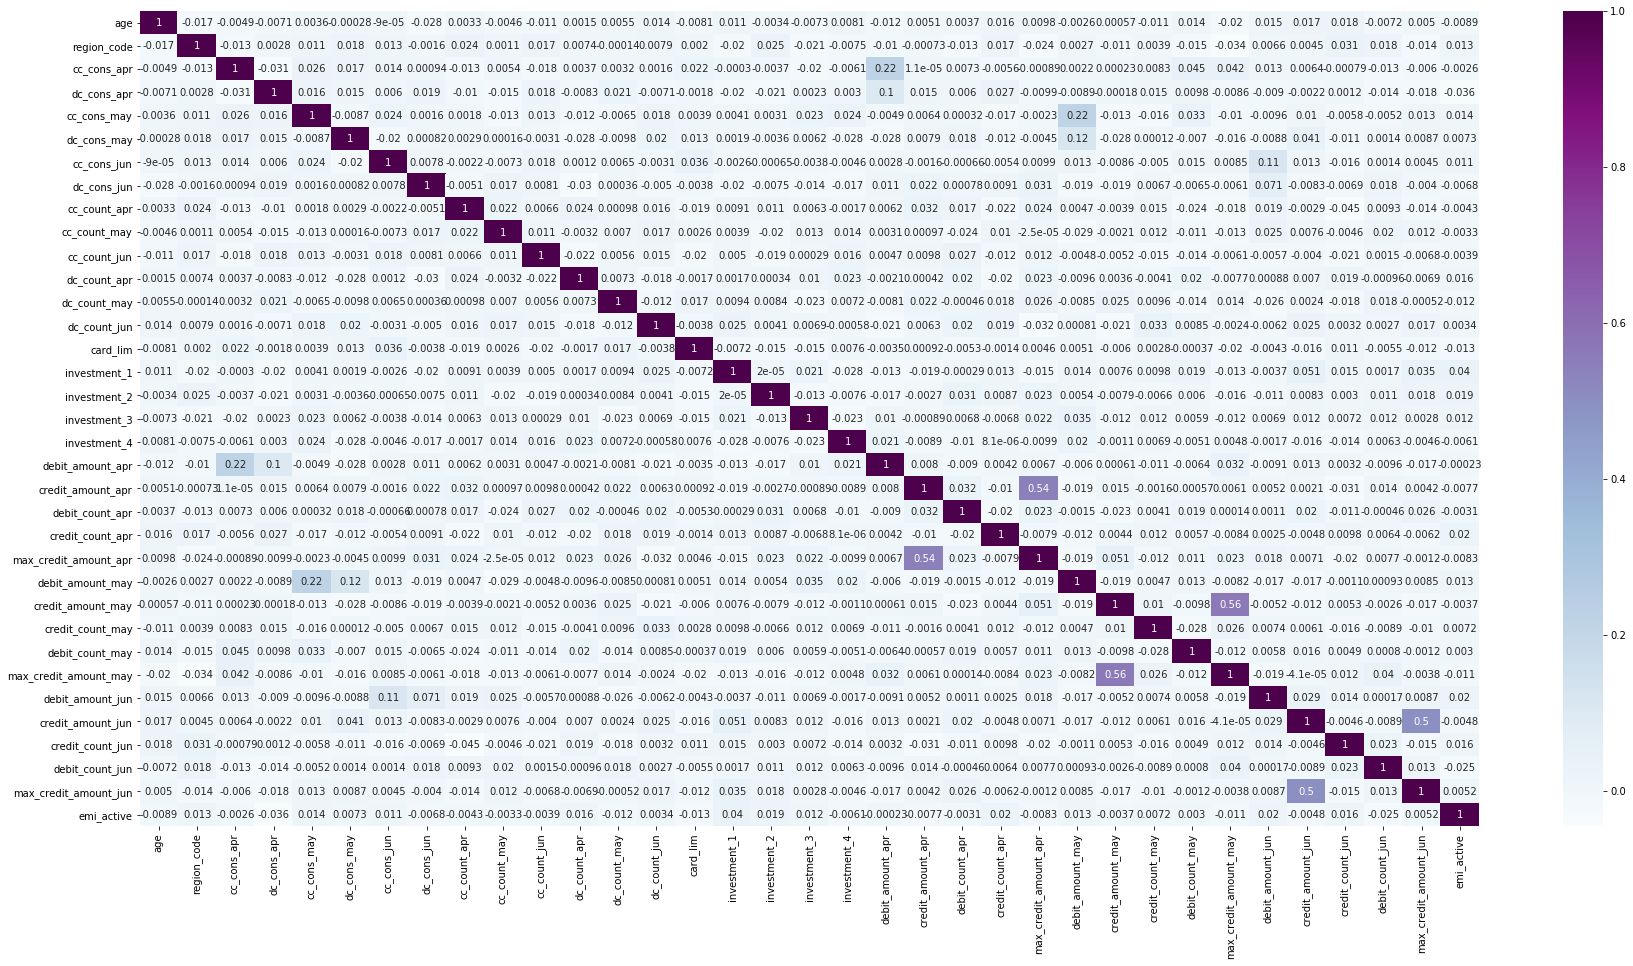

In [82]:
dataset_corr = transformed_dataset.corr()
plt.figure(figsize=(30,15))
sns.heatmap(dataset_corr,annot=True,cmap='BuPu')

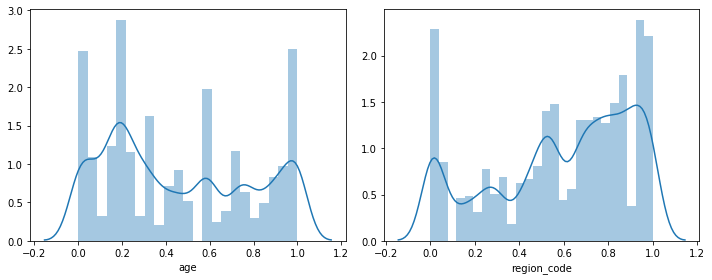

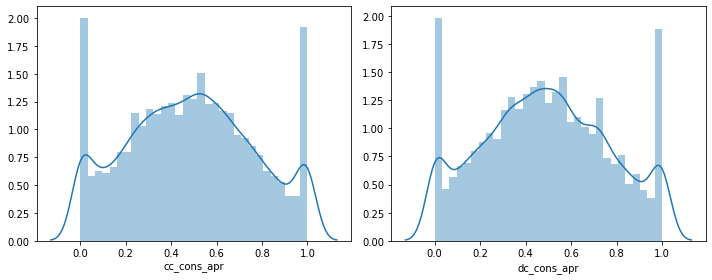

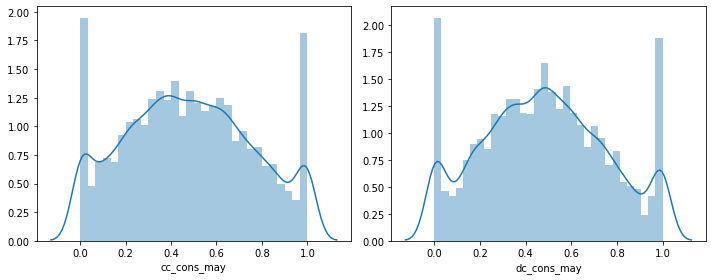

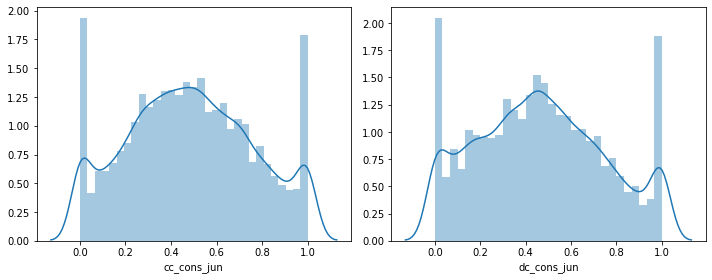

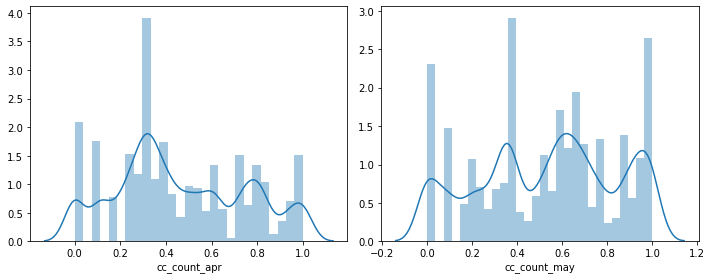

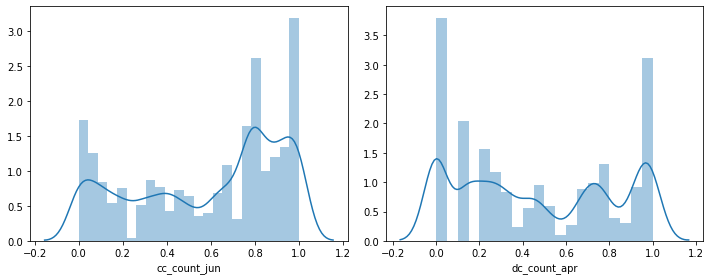

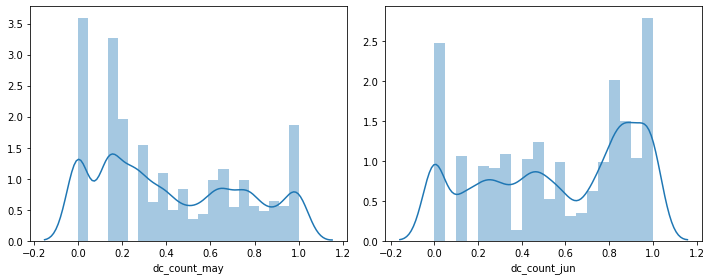

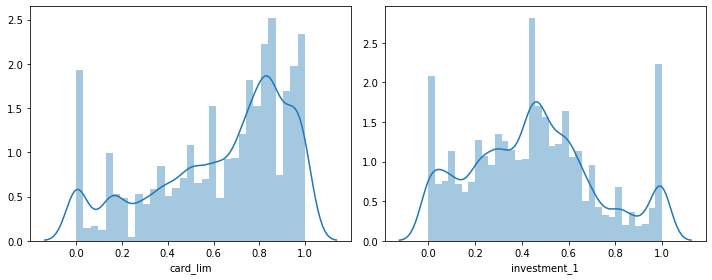

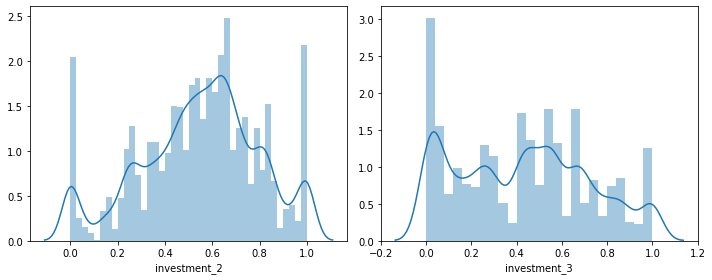

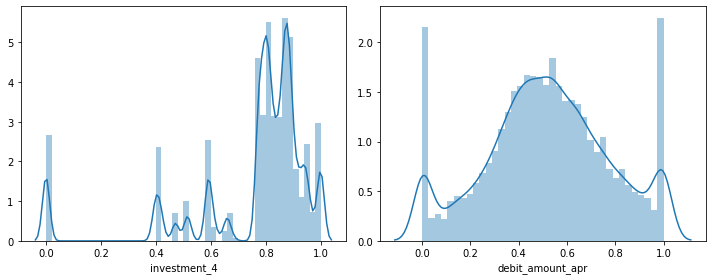

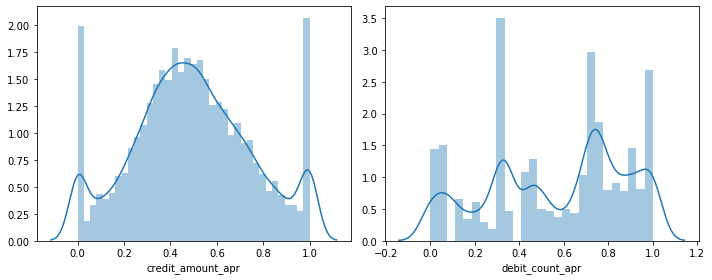

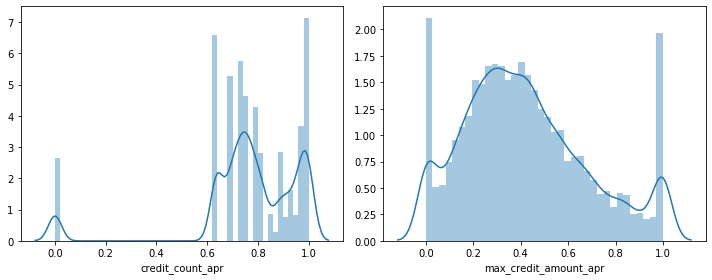

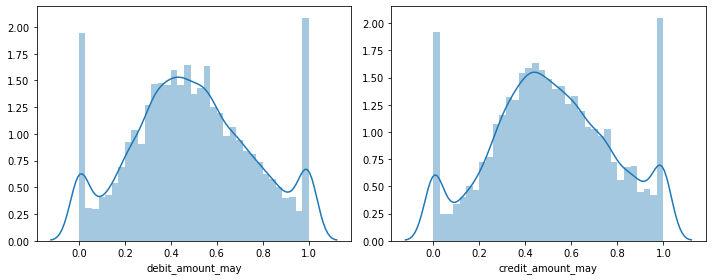

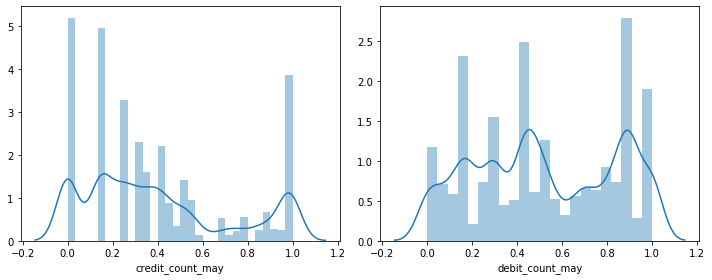

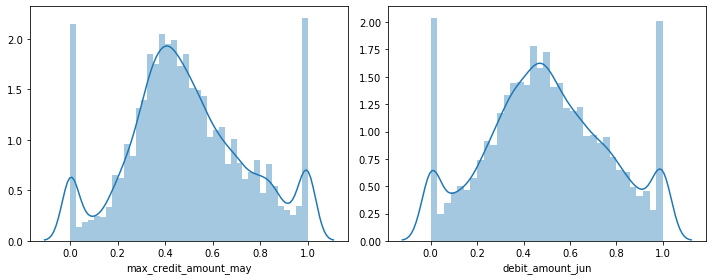

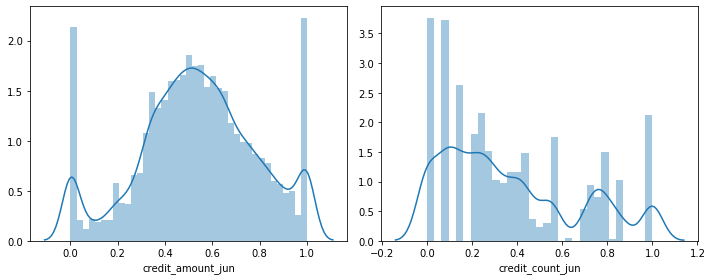

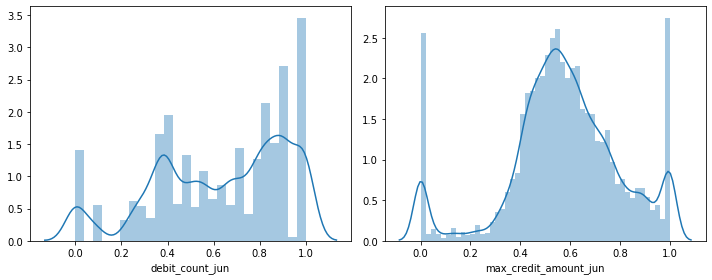

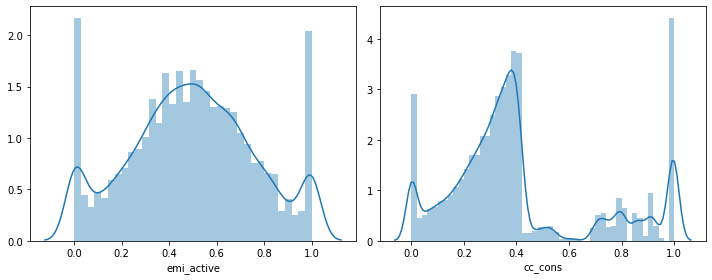

In [117]:
plot_distplots(scaled_dataset)

In [84]:
ohe = OneHotEncoder()
cat_features = dataset_without_zerovariance_cols.select_dtypes(include='object')
cat_features_ohe = ohe.fit_transform(cat_features).toarray()
cat_features_ohe = pd.DataFrame(cat_features_ohe,columns=['saving_account','current_acc','female','male'])
merged_dataset = pd.concat([cat_features_ohe,transformed_dataset],axis=1)
# merge_df.drop(cat_features.columns,axis=1,inplace=True)
merged_dataset.head()

,saving_account,current_acc,female,male,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,...,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active
0,1.0,0.0,0.0,1.0,37,575,52.872015,35.916570,78.364852,26.009614,...,98.742088,4.898979,20.0,98.742088,174.722294,161.077373,1.732051,12.0,161.077373,34.212425
1,1.0,0.0,0.0,1.0,33,394,171.479241,40.496913,40.865633,49.637889,...,130.257437,6.557439,40.0,130.257437,119.761555,110.516967,2.449490,39.0,110.516967,128.247612
2,1.0,0.0,0.0,1.0,53,324,77.364074,78.670198,51.923887,27.676705,...,190.782599,6.480741,35.0,190.782599,180.286328,114.956514,2.236068,9.0,114.956514,51.208202
3,1.0,0.0,0.0,1.0,33,370,45.890413,135.000000,186.449886,12.922848,...,219.426525,1.732051,5.0,312.769883,305.896093,268.918203,4.582576,0.0,268.918203,18.460498
4,1.0,0.0,0.0,1.0,62,505,57.175169,59.430632,56.199644,51.959311,...,161.015527,8.366600,75.0,167.140659,137.882196,203.472357,2.449490,35.0,205.776578,53.030180


In [86]:
testdata_preprocessed_1 = merged_dataset.to_csv('../Data/testdata_preprocessed_1.csv',index=False)